In [1]:

import pandas as pd
shark = pd.read_excel("GSAF5-1.xls")
shark.head()
shark.info()
region_mapping = pd.read_csv('https://raw.githubusercontent.com/cphalpert/census-regions/master/us%20census%20bureau%20regions%20and%20divisions.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25760 entries, 0 to 25759
Data columns (total 24 columns):
Case Number               8739 non-null object
Date                      6451 non-null object
Year                      6449 non-null float64
Type                      6447 non-null object
Country                   6401 non-null object
Area                      5988 non-null object
Location                  5904 non-null object
Activity                  5901 non-null object
Name                      6241 non-null object
Sex                       5886 non-null object
Age                       3586 non-null object
Injury                    6423 non-null object
Fatal (Y/N)               5905 non-null object
Time                      3064 non-null object
Species                   3545 non-null object
Investigator or Source    6434 non-null object
pdf                       6451 non-null object
href formula              6449 non-null object
href                      6451 non-null obje

In [2]:
shark.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [3]:
shark.columns = shark.columns.str.rstrip()

In [4]:
shark.isnull().sum()

Case Number               17021
Date                      19309
Year                      19311
Type                      19313
Country                   19359
Area                      19772
Location                  19856
Activity                  19859
Name                      19519
Sex                       19874
Age                       22174
Injury                    19337
Fatal (Y/N)               19855
Time                      22696
Species                   22215
Investigator or Source    19326
pdf                       19309
href formula              19311
href                      19309
Case Number.1             19309
Case Number.2             19309
original order            19309
Unnamed: 22               25759
Unnamed: 23               25758
dtype: int64

In [5]:
shark = shark.dropna(subset=['Activity','Area','Country','Location'],how='all')

In [6]:
shark.info()
region_mapping.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6444 entries, 0 to 6450
Data columns (total 24 columns):
Case Number               6443 non-null object
Date                      6444 non-null object
Year                      6442 non-null float64
Type                      6440 non-null object
Country                   6401 non-null object
Area                      5988 non-null object
Location                  5904 non-null object
Activity                  5901 non-null object
Name                      6234 non-null object
Sex                       5879 non-null object
Age                       3584 non-null object
Injury                    6417 non-null object
Fatal (Y/N)               5898 non-null object
Time                      3062 non-null object
Species                   3544 non-null object
Investigator or Source    6427 non-null object
pdf                       6444 non-null object
href formula              6442 non-null object
href                      6444 non-null object

In [7]:
shark.isnull().sum()

Case Number                  1
Date                         0
Year                         2
Type                         4
Country                     43
Area                       456
Location                   540
Activity                   543
Name                       210
Sex                        565
Age                       2860
Injury                      27
Fatal (Y/N)                546
Time                      3382
Species                   2900
Investigator or Source      17
pdf                          0
href formula                 2
href                         0
Case Number.1                0
Case Number.2                0
original order               0
Unnamed: 22               6443
Unnamed: 23               6442
dtype: int64

In [8]:

import numpy as np

final_data = shark[np.logical_and(shark["Year"]>1999, shark["Year"]<2020)]
# to get us data
us_data = final_data[final_data.Country == 'USA']

In [9]:
us_data.info()
us_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1087 entries, 0 to 2218
Data columns (total 24 columns):
Case Number               1087 non-null object
Date                      1087 non-null object
Year                      1087 non-null float64
Type                      1087 non-null object
Country                   1087 non-null object
Area                      1087 non-null object
Location                  1080 non-null object
Activity                  1036 non-null object
Name                      1077 non-null object
Sex                       1059 non-null object
Age                       872 non-null object
Injury                    1087 non-null object
Fatal (Y/N)               1023 non-null object
Time                      900 non-null object
Species                   676 non-null object
Investigator or Source    1085 non-null object
pdf                       1087 non-null object
href formula              1087 non-null object
href                      1087 non-null object
Ca

Case Number                  0
Date                         0
Year                         0
Type                         0
Country                      0
Area                         0
Location                     7
Activity                    51
Name                        10
Sex                         28
Age                        215
Injury                       0
Fatal (Y/N)                 64
Time                       187
Species                    411
Investigator or Source       2
pdf                          0
href formula                 0
href                         0
Case Number.1                0
Case Number.2                0
original order               0
Unnamed: 22               1086
Unnamed: 23               1087
dtype: int64

In [10]:
new_us_data = pd.merge(us_data, region_mapping, left_on='Area', right_on='State')
new_us_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1078 entries, 0 to 1077
Data columns (total 28 columns):
Case Number               1078 non-null object
Date                      1078 non-null object
Year                      1078 non-null float64
Type                      1078 non-null object
Country                   1078 non-null object
Area                      1078 non-null object
Location                  1074 non-null object
Activity                  1027 non-null object
Name                      1068 non-null object
Sex                       1050 non-null object
Age                       864 non-null object
Injury                    1078 non-null object
Fatal (Y/N)               1015 non-null object
Time                      893 non-null object
Species                   670 non-null object
Investigator or Source    1076 non-null object
pdf                       1078 non-null object
href formula              1078 non-null object
href                      1078 non-null object
Ca

In [11]:
print(new_us_data.groupby('Activity').size().sort_values(ascending=False))
#dropping all the activity which is not given. We can discuss on this
new_us_data = new_us_data.dropna(subset=['Activity'])
new_us_data.info()

Activity
Surfing                                                393
Swimming                                               154
Wading                                                  66
Fishing                                                 37
Standing                                                32
Spearfishing                                            27
Boogie boarding                                         22
Snorkeling                                              21
Body boarding                                           16
Boogie Boarding                                         13
Kayaking                                                12
Body surfing                                            11
Diving                                                   9
Walking                                                  8
Stand-Up Paddleboarding                                  7
Kayak Fishing                                            7
Paddle boarding                                

In [12]:
import re
import numpy as np
# final_data.loc[final_data.Activity.str.contains('fishing',case=False, regex=True), 'Activity'] = 'xyz'

fishing = 'fishing'
surfing = 'surfing'
swimming = 'swimming'
wading = 'wading'
others = 'others'
def replace_activity(x):
    
    if fishing in x:
        return "Fishing"
    elif surfing in x:
        return "Surfing"
    elif swimming in x:
        return "Swimming"
    elif wading in x:
        return "Wading"
    else:
        return "Others"

In [13]:
new_us_data['Activity_NewCol'] = new_us_data.apply(lambda x: replace_activity(x['Activity'].lower()), axis=1)

In [14]:
new_us_data.groupby('Activity_NewCol').size().sort_values(ascending=False)

Activity_NewCol
Surfing     430
Others      249
Swimming    176
Fishing     103
Wading       69
dtype: int64

Activity_NewCol
Fishing     103
Others      249
Surfing     430
Swimming    176
Wading       69
dtype: int64


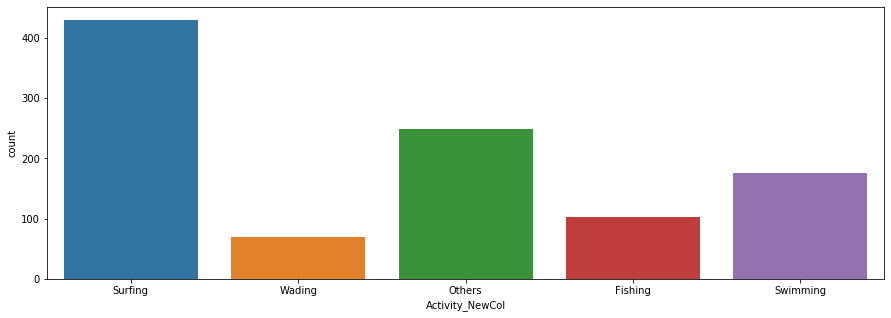

In [16]:
###### Write your code here
import seaborn as sns
import matplotlib.pyplot as plt
act=print(new_us_data.groupby("Activity_NewCol").size())
plt.figure(figsize=(15,5))
sns.countplot(x="Activity_NewCol",data=new_us_data)
plt.show()

In [17]:
dt=new_us_data[new_us_data.Region == 'South']
dt=(dt[dt.Activity_NewCol== 'Surfing'])
Surfing=[]
Surfing.append(dt.Activity_NewCol.count())

In [18]:
dt=new_us_data[new_us_data.Region == 'West']
dt=(dt[dt.Activity_NewCol== 'Surfing'])
Surfing.append(dt.Activity_NewCol.count())

In [19]:
dt=new_us_data[new_us_data.Region == 'Northeast']
dt=(dt[dt.Activity_NewCol== 'Surfing'])
Surfing.append(dt.Activity_NewCol.count())

In [20]:
Surfing

[302, 123, 5]

In [21]:
dt=new_us_data[new_us_data.Region == 'South']
dt=(dt[dt.Activity_NewCol== 'Others'])
Others=[]
Others.append(dt.Activity_NewCol.count())

In [22]:

dt=new_us_data[new_us_data.Region == 'West']
dt=(dt[dt.Activity_NewCol== 'Others'])
Others.append(dt.Activity_NewCol.count())

In [23]:
dt=new_us_data[new_us_data.Region == 'Northeast']
dt=(dt[dt.Activity_NewCol== 'Others'])
Others.append(dt.Activity_NewCol.count())

In [24]:
Others

[156, 85, 8]

In [25]:
dt=new_us_data[new_us_data.Region == 'South']
dt=(dt[dt.Activity_NewCol== 'Swimming'])
Swimming=[]
Swimming.append(dt.Activity_NewCol.count())

In [26]:
dt=new_us_data[new_us_data.Region == 'West']
dt=(dt[dt.Activity_NewCol== 'Swimming'])
Swimming.append(dt.Activity_NewCol.count())

In [27]:
dt=new_us_data[new_us_data.Region == 'Northeast']
dt=(dt[dt.Activity_NewCol== 'Swimming'])
Swimming.append(dt.Activity_NewCol.count())

In [28]:
Swimming

[142, 33, 1]

In [29]:
dt=new_us_data[new_us_data.Region == 'South']
dt=(dt[dt.Activity_NewCol== 'Fishing'])
Fishing=[]
Fishing.append(dt.Activity_NewCol.count())

In [30]:
dt=new_us_data[new_us_data.Region == 'West']
dt=(dt[dt.Activity_NewCol== 'Fishing'])
Fishing.append(dt.Activity_NewCol.count())

In [31]:
dt=new_us_data[new_us_data.Region == 'Northeast']
dt=(dt[dt.Activity_NewCol== 'Fishing'])
Fishing.append(dt.Activity_NewCol.count())

In [32]:
Fishing

[66, 32, 5]

In [33]:
dt=new_us_data[new_us_data.Region == 'South']
dt=(dt[dt.Activity_NewCol== 'Wading'])
Wading=[]
Wading.append(dt.Activity_NewCol.count())

In [34]:
dt=new_us_data[new_us_data.Region == 'West']
dt=(dt[dt.Activity_NewCol== 'Wading'])
Wading.append(dt.Activity_NewCol.count())

In [35]:
dt=new_us_data[new_us_data.Region == 'Northeast']
dt=(dt[dt.Activity_NewCol== 'Wading'])
Wading.append(dt.Activity_NewCol.count())

In [36]:
Wading

[66, 2, 1]

In [37]:
print(Surfing)
print(Swimming)
print(Wading)
print(Fishing)
print(Others)

[302, 123, 5]
[142, 33, 1]
[66, 2, 1]
[66, 32, 5]
[156, 85, 8]


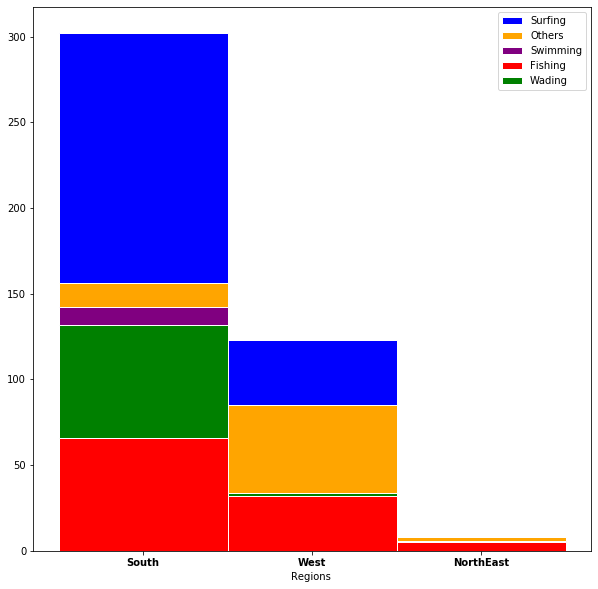

In [38]:
plt.figure(figsize=(10,10))
r = [0,1,2]
names = ['South','West','NorthEast']
barWidth = 1

plt.bar(r, Surfing, color='blue', edgecolor='white', label="Surfing",width=barWidth)
plt.bar(r, Others, color='orange', edgecolor='white',width=barWidth,label="Others")
plt.bar(r, Swimming, color='purple', edgecolor='white',width=barWidth,label="Swimming") 

plt.bar(r, Fishing, color='red', edgecolor='white',width=barWidth,label="Fishing")

plt.bar(r, Wading, color='green', edgecolor='white',width=barWidth,label="Wading",bottom=Fishing)

plt.xticks(r, names, fontweight='bold')
plt.xlabel("Regions ")
plt.legend()
plt.show()

In [39]:
new_us_data.groupby("Region").size()

Region
Northeast     20
South        732
West         275
dtype: int64

In [40]:
new_us_data.groupby("Division").size()

Division
East South Central      9
Middle Atlantic        10
Mountain                1
New England            10
Pacific               274
South Atlantic        686
West South Central     37
dtype: int64

Region
Northeast     20
South        732
West         275
dtype: int64


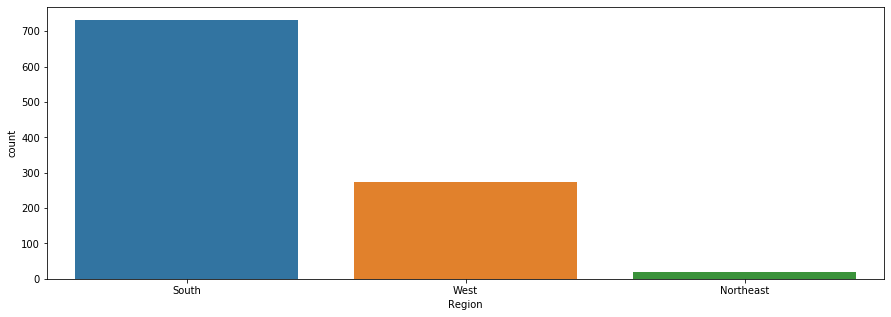

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
print(new_us_data.groupby("Region").size())
plt.figure(figsize=(15,5))
sns.countplot(x="Region",data=new_us_data)

Division
East South Central      9
Middle Atlantic        10
Mountain                1
New England            10
Pacific               274
South Atlantic        686
West South Central     37
dtype: int64


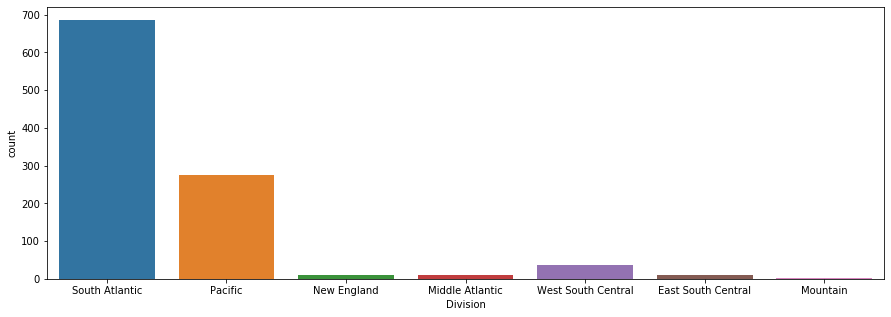

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
print(new_us_data.groupby("Division").size())
plt.figure(figsize=(15,5))
sns.countplot(x="Division",data=new_us_data)